In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

from sklearn.model_selection import train_test_split

In [3]:
Data = pd.read_csv('/content/drive/My Drive/REST_dataset_final.csv')
Data = Data.drop(['Unnamed: 0'], axis=1)

Data.head(1000)

,Seq,Virus Name,Viral disease,Drug Name,Indication,4-HPR (Fenretinide),ABT-263,Acetylsalicylic acid,Aciclovir,Alisporivir,Alpha-lipoic acid,Amiodarone,Amodiaquine,Anisomycin,Apoptozole,Aprotinin,Arbidol (Umifenovir),Artesunate,Atovaquone,Azacitidine,Azithromycin,BCX4430 (Galidesivir),Benztropine,Bepridil,Berberine,Bithionol,Bortezomib,Brequinar,Brincidofovir,CYT107,Caffeine,Camostat,Camptothecin,Cepharanthine,Chloroquine,Chlorpromazine,Cidofovir,Clomipramine,Cyclosporine,Dalbavancin,...,Nelfinavir,Niclosamide,Nitazoxanide,Novobiocin,Obatoclax,Oritavancin,Pentosan polysulfate,Pirlindole,Pleconaril,Posaconazole,Promethazine,Quinacrine,Quinine,Raloxifene,Rapamycin (Sirolimus),Regorafenib,Remdesivir,Ribavirin,Ritonavir,Roscovitine (Seliciclib),Salinomycin,Saracatinib,Silvestrol,Simvastatin,Sofosbuvir,Sorafenib,Sunitinib,Suramin,Tamoxifen,Teicoplanin,Telavancin,Tenofovir,Teriflunomide,Thymalfasin,Tilorone (Amixin),Topotecan,Toremifene,Valacyclovir,Verapamil,Zanamivir
0,ACTTTGTGTCTACTCTTCTCAACTAAACGAAATTTTTCTAGTGCTG...,Human coronavirus strain NL63,Respiratory tract infection,Emetine,Approved antiprotozoal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GCTGAGACTAACATCTAAGCTGATTAACCAGTCACCCCATGCCTGG...,Parechovirus A3,Infection of the central nervous system,Itraconazole,Approved antifungal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,ACACAAAGGCGCCCAATCATGGATTCTATATTATCAAAACAGCTGG...,Rift Valley fever virus,Rift Valley fever,Azacitidine,Approved anticancer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,AACTTGCACACTCGAAAAAAATGGGGCAAATAAGAATTTGATAAGT...,Respiratory syncytial virus,Lower respiratory tract infections,4-HPR (Fenretinide),Approved anticancer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,GCACCGGGGATCCTAGGCGTAACTTCATCACTAAAATCTCAGATTC...,Junin virus,Argentine hemorrhagic fever,Brequinar,Investigational anticancer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CCTTTTTAATCAGAAATGGGCGCGAAAAAATGCGTACTACAAACTT...,Respiratory syncytial virus,Lower respiratory tract infections,4-HPR (Fenretinide),Approved anticancer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
996,CCATTCCGGGCCGTGTGCTGGGTCCCCGAGGGGCGGGGGGGTGTTT...,Herpes simplex virus 1,Cold sores,ABT-263,Investigational anticancer,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
997,TTTTCCCAGCCAGAGGTGGCTGGTTAAATAATACCTATTGTAACAA...,Parechovirus A3,Infection of the central nervous system,Itraconazole,Approved antifungal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
998,ATGGGCCGCTTCCGGCGAACGAGCCCGAAGAGCGAGTGGGGGAGAA...,Hepatitis D virus,Hepatitis D,Ezetimibe,Approved lipid-lowering,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X_data = Data['Seq'].to_numpy()

data = Data
y_data = data.drop(["Seq", "Virus Name", "Viral disease", "Drug Name", "Indication"], axis=1).values

In [24]:
y_data[1034]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
X_data.shape, y_data.shape

((33619,), (33619, 126))

In [6]:
X_data = [x.lower() for x in X_data]
X_data = [x[:10000] for x in X_data]

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

train_texts = X_data

tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(train_texts)

tk.word_index

{'UNK': 1,
 'a': 2,
 'b': 14,
 'c': 5,
 'd': 16,
 'g': 4,
 'h': 13,
 'k': 11,
 'm': 9,
 'n': 6,
 'r': 8,
 's': 12,
 't': 3,
 'v': 15,
 'w': 10,
 'y': 7}

In [8]:
tk.num_words

In [9]:
train_sequences = tk.texts_to_sequences(train_texts)
train_data = pad_sequences(train_sequences, maxlen=10000, padding='post')

In [10]:
train_data.shape

(33619, 10000)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, y_data, test_size = 0.20, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(26895, 10000) (26895, 126)
(6724, 10000) (6724, 126)


In [12]:
X_train[0].shape

(10000,)

In [13]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import *
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import *

In [17]:
model = Sequential()
model.add(Embedding(16, 240, input_length=10000))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(126))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10000, 240)        3840      
_________________________________________________________________
dense_1 (Dense)              (None, 10000, 512)        123392    
_________________________________________________________________
activation_1 (Activation)    (None, 10000, 512)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10000, 512)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 10000, 126)        64638     
_________________________________________________________________
activation_2 (Activation)    (None, 10000, 126)        0         
Total params: 191,870
Trainable params: 191,870
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

In [19]:
# define the model
model = Sequential()
model.add(Embedding(16, 240, input_length=10000))
model.add(Conv1D(filters=500, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(500, input_shape=(125, 10000), return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(126, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10000, 240)        3840      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10000, 500)        360500    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2500, 500)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2500, 500)         2002000   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)              

In [20]:
epochs = 10
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
 75/673 [==>...........................] - ETA: 17:51 - loss: 56.4742 - acc: 0.0100

KeyboardInterrupt: ignored

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


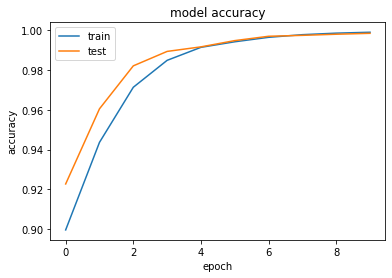

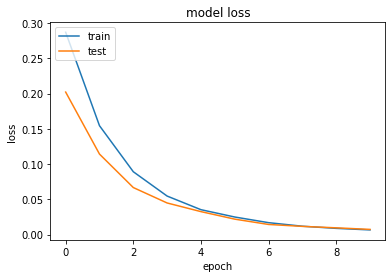

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pr = reconstructed_model.predict(X_test[:2])

In [ ]:
p = Y_test[:2]

In [ ]:
p[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pr[0]

array([1.9463828e-07, 9.7432916e-05, 3.8760405e-08, 1.6547103e-05,
       1.4395512e-05, 6.2394843e-06, 2.0518994e-06, 1.7240269e-05,
       1.3602347e-07, 7.4094473e-08, 1.7660952e-04, 9.4540832e-05,
       3.6934045e-05, 6.0070064e-08, 4.0364056e-03, 5.2133359e-08,
       5.4322160e-04, 4.5387237e-06, 7.1827753e-07, 2.5291254e-07,
       1.0413316e-06, 1.5289670e-06, 2.6712197e-04, 1.1929362e-03,
       1.5764516e-06, 2.4274935e-04, 6.7600513e-06, 1.6751750e-05,
       5.8611312e-07, 3.1487352e-06, 9.1908496e-06, 1.5835870e-03,
       5.9049371e-06, 4.7468615e-04, 4.0914060e-07, 1.5309015e-06,
       2.2114125e-04, 3.5941564e-06, 4.5918378e-07, 2.9335468e-04,
       7.9742478e-08, 1.9211849e-04, 8.0098931e-07, 6.3210159e-06,
       3.4048012e-04, 9.8434772e-05, 1.0168174e-03, 8.0215244e-04,
       4.0054420e-06, 2.6500811e-07, 9.1440706e-05, 2.5763220e-05,
       7.4063678e-04, 3.3784778e-05, 1.5101410e-06, 1.1166034e-03,
       3.7388061e-04, 9.6152419e-01, 1.9611973e-05, 4.1390984e

In [ ]:
model.save('/content/drive/My Drive/COVID_ANTIVIRAL_PRED.h5')

In [ ]:
import keras
reconstructed_model = keras.models.load_model('/content/drive/My Drive/COVID_ANTIVIRAL_PRED.h5')

In [ ]:
reconstructed_model.predict(X_test[6:7])

array([[6.72189854e-05, 5.36686974e-04, 1.66215304e-05, 1.93924483e-04,
        1.09399689e-05, 7.15403439e-06, 8.01756978e-03, 9.90652919e-01,
        6.44240281e-05, 3.46090458e-03, 1.25465478e-04, 2.06682994e-03,
        2.76077236e-03, 8.14533967e-04, 1.17272958e-02, 1.57618662e-03,
        2.62960605e-02, 2.37062064e-04, 5.02251030e-04, 9.49611422e-03,
        1.61575804e-06, 2.51275796e-05, 4.38115932e-03, 1.08258578e-03,
        1.98623873e-08, 2.88936018e-04, 1.59773572e-05, 7.01900106e-04,
        1.19757555e-04, 5.52790426e-03, 2.58146622e-03, 2.37615709e-03,
        1.64853409e-03, 3.98734026e-03, 2.77646584e-04, 2.52354567e-07,
        3.66959139e-04, 1.24721101e-03, 4.67275910e-04, 9.29248612e-03,
        3.83412407e-04, 9.71013606e-01, 3.25730725e-05, 1.10117016e-05,
        3.48620188e-06, 9.99467313e-01, 4.80257615e-04, 3.30788200e-04,
        8.74009203e-08, 1.94783820e-06, 2.34077670e-05, 1.77411581e-04,
        7.82860501e-04, 2.59314703e-07, 1.37519792e-05, 1.112197